# Loan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score

In [212]:
df = pd.read_csv("../loan-clean.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,136.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


## Statistical Analysis

In [213]:
df.groupby(["Credit_History"]).count()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status,Income
Credit_History,,,,,,,,,,,,,
0.0,89,89,89,89,89,89,89,89,89,89,89,89,89
1.0,470,470,470,470,470,470,470,470,470,470,470,470,470


In [214]:
df_credit_1 = df[df["Credit_History"] == 1].sample(90)
df_credit_0 = df[df["Credit_History"] == 0]

df = pd.concat([df_credit_1, df_credit_0], ignore_index=True)
df.shape

(179, 14)

In [215]:
df.groupby(["Credit_History"]).count()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status,Income
Credit_History,,,,,,,,,,,,,
0.0,89,89,89,89,89,89,89,89,89,89,89,89,89
1.0,90,90,90,90,90,90,90,90,90,90,90,90,90


## Feature Selection

In [216]:
df.drop(columns=["Loan_ID"], inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
0,Male,Yes,0,Graduate,No,2625,6250.0,187.0,360.0,1.0,Rural,Y,8875.0
1,Male,Yes,2,Graduate,No,5935,0.0,133.0,360.0,1.0,Semiurban,Y,5935.0
2,Female,No,1,Graduate,No,2876,1560.0,90.0,360.0,1.0,Urban,Y,4436.0
3,Male,Yes,0,Graduate,No,6133,3906.0,324.0,360.0,1.0,Urban,Y,10039.0
4,Male,No,0,Not Graduate,No,2717,0.0,60.0,180.0,1.0,Urban,Y,2717.0


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             179 non-null    object 
 1   Married            179 non-null    object 
 2   Dependents         179 non-null    object 
 3   Education          179 non-null    object 
 4   Self_Employed      179 non-null    object 
 5   ApplicantIncome    179 non-null    int64  
 6   CoapplicantIncome  179 non-null    float64
 7   LoanAmount         179 non-null    float64
 8   Loan_Amount_Term   179 non-null    float64
 9   Credit_History     179 non-null    float64
 10  Property_Area      179 non-null    object 
 11  Loan_Status        179 non-null    object 
 12  Income             179 non-null    float64
dtypes: float64(5), int64(1), object(7)
memory usage: 18.3+ KB


In [218]:
df["Dependents"].unique()

array(['0', '2', '1', '3+'], dtype=object)

In [219]:
df["Dependents"] = np.where(df["Dependents"] == '3+', 3, df["Dependents"])
df["Dependents"].unique()

array(['0', '2', '1', 3], dtype=object)

In [220]:
df = df.astype({"Dependents": "int16"})
df["Dependents"].unique()

array([0, 2, 1, 3], dtype=int16)

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             179 non-null    object 
 1   Married            179 non-null    object 
 2   Dependents         179 non-null    int16  
 3   Education          179 non-null    object 
 4   Self_Employed      179 non-null    object 
 5   ApplicantIncome    179 non-null    int64  
 6   CoapplicantIncome  179 non-null    float64
 7   LoanAmount         179 non-null    float64
 8   Loan_Amount_Term   179 non-null    float64
 9   Credit_History     179 non-null    float64
 10  Property_Area      179 non-null    object 
 11  Loan_Status        179 non-null    object 
 12  Income             179 non-null    float64
dtypes: float64(5), int16(1), int64(1), object(6)
memory usage: 17.3+ KB


In [222]:
df["Loan_Status"] = np.where(df["Loan_Status"] == 'Y', 1, 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             179 non-null    object 
 1   Married            179 non-null    object 
 2   Dependents         179 non-null    int16  
 3   Education          179 non-null    object 
 4   Self_Employed      179 non-null    object 
 5   ApplicantIncome    179 non-null    int64  
 6   CoapplicantIncome  179 non-null    float64
 7   LoanAmount         179 non-null    float64
 8   Loan_Amount_Term   179 non-null    float64
 9   Credit_History     179 non-null    float64
 10  Property_Area      179 non-null    object 
 11  Loan_Status        179 non-null    int32  
 12  Income             179 non-null    float64
dtypes: float64(5), int16(1), int32(1), int64(1), object(5)
memory usage: 16.6+ KB


## Outliers Removal

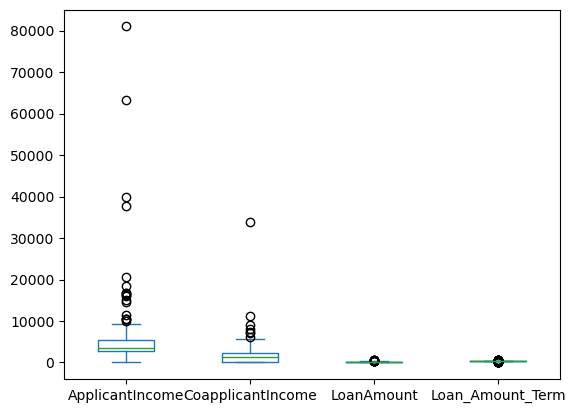

In [223]:
outliers_check = ["ApplicantIncome", "CoapplicantIncome",
                 "LoanAmount", "Loan_Amount_Term"]

df[outliers_check].plot.box()
plt.show()

## One-Hot Encoder

In [224]:
categorical_features = ["Gender", "Married", "Education",
                        "Self_Employed", "Property_Area"]

encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
matrix = encoder.fit_transform(df[categorical_features])
encoder_feature_names = encoder.get_feature_names_out()
df_encoded = pd.DataFrame(data=matrix, columns=encoder_feature_names)
df = pd.merge(df, df_encoded, left_index=True, right_index=True)
df.drop(columns=categorical_features, inplace=True)
df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Income,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,2625,6250.0,187.0,360.0,1.0,1,8875.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,2,5935,0.0,133.0,360.0,1.0,1,5935.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1,2876,1560.0,90.0,360.0,1.0,1,4436.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0,6133,3906.0,324.0,360.0,1.0,1,10039.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0,2717,0.0,60.0,180.0,1.0,1,2717.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dependents               179 non-null    int16  
 1   ApplicantIncome          179 non-null    int64  
 2   CoapplicantIncome        179 non-null    float64
 3   LoanAmount               179 non-null    float64
 4   Loan_Amount_Term         179 non-null    float64
 5   Credit_History           179 non-null    float64
 6   Loan_Status              179 non-null    int32  
 7   Income                   179 non-null    float64
 8   Gender_Female            179 non-null    float64
 9   Gender_Male              179 non-null    float64
 10  Married_No               179 non-null    float64
 11  Married_Yes              179 non-null    float64
 12  Education_Graduate       179 non-null    float64
 13  Education_Not Graduate   179 non-null    float64
 14  Self_Employed_No         1

## Scaling

In [226]:
features_to_scale = ["Dependents", "ApplicantIncome", "CoapplicantIncome",
                     "LoanAmount", "Loan_Amount_Term", "Income"]

scaler = MinMaxScaler(clip=True)
# df[features_to_scale] = scaler.fit_transform(df[features_to_scale])
scaled_features = scaler.fit_transform(df.copy())
df = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)
df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Income,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.000000,0.030612,0.184709,0.269027,0.696970,1.0,1.0,0.093429,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.666667,0.071552,0.000000,0.173451,0.696970,1.0,1.0,0.056475,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.333333,0.033717,0.046103,0.097345,0.696970,1.0,1.0,0.037633,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.000000,0.074001,0.115436,0.511504,0.696970,1.0,1.0,0.108060,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.000000,0.031750,0.000000,0.044248,0.242424,1.0,1.0,0.016026,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [227]:
df["Dependents"].unique()

array([0.        , 0.66666667, 0.33333333, 1.        ])

## Train/Test Split

In [228]:
X = df.drop(columns=["Loan_Status"]) # only features
y = df[["Loan_Status"]] # only label (target)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    random_state=42)

print(X_train.shape, X_test.shape)

(143, 18) (36, 18)


## Training

In [229]:
# Fitting model based on the train data
model = MLPClassifier(
            random_state=42,
            max_iter=1000,
            hidden_layer_sizes=(100, 80, 50,),
            n_iter_no_change=50,
            early_stopping=True, # it uses 10% of training for validation
            verbose=True)
model.fit(X_train, y_train)

Iteration 1, loss = 0.68151486
Validation score: 0.533333
Iteration 2, loss = 0.66985902
Validation score: 0.600000
Iteration 3, loss = 0.65852006
Validation score: 0.666667
Iteration 4, loss = 0.64730670
Validation score: 0.666667
Iteration 5, loss = 0.63655689
Validation score: 0.600000
Iteration 6, loss = 0.62620512
Validation score: 0.666667
Iteration 7, loss = 0.61548246
Validation score: 0.666667
Iteration 8, loss = 0.60487635
Validation score: 0.666667
Iteration 9, loss = 0.59438560
Validation score: 0.666667
Iteration 10, loss = 0.58367248
Validation score: 0.733333
Iteration 11, loss = 0.57288609
Validation score: 0.733333
Iteration 12, loss = 0.56184592
Validation score: 0.733333
Iteration 13, loss = 0.55010269
Validation score: 0.800000
Iteration 14, loss = 0.53777560
Validation score: 0.800000
Iteration 15, loss = 0.52504618
Validation score: 0.800000
Iteration 16, loss = 0.51194613
Validation score: 0.800000
Iteration 17, loss = 0.49851847
Validation score: 0.800000
Iterat

C:\ProgramData\Miniconda3\envs\ai\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 57, loss = 0.22888107
Validation score: 0.733333
Iteration 58, loss = 0.22678302
Validation score: 0.733333
Iteration 59, loss = 0.22472335
Validation score: 0.666667
Iteration 60, loss = 0.22276925
Validation score: 0.666667
Iteration 61, loss = 0.22089598
Validation score: 0.666667
Iteration 62, loss = 0.21898821
Validation score: 0.666667
Iteration 63, loss = 0.21706604
Validation score: 0.666667
Iteration 64, loss = 0.21510740
Validation score: 0.666667
Validation score did not improve more than tol=0.000100 for 50 consecutive epochs. Stopping.


MLPClassifier(early_stopping=True, hidden_layer_sizes=(100, 80, 50),
              max_iter=1000, n_iter_no_change=50, random_state=42,
              verbose=True)

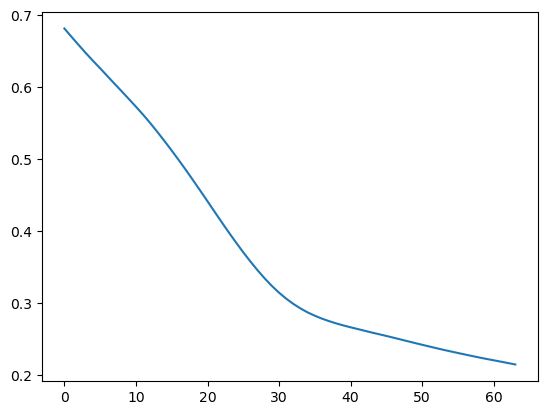

In [230]:
loss_curve = model.loss_curve_
plt.plot(loss_curve)
plt.show()

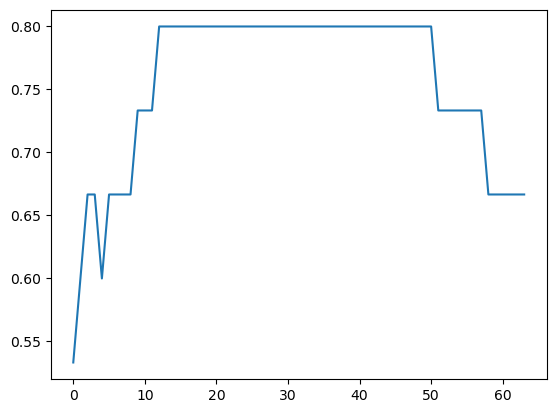

In [231]:
vs_curve = model.validation_scores_
plt.plot(vs_curve)
plt.show()

## Evaluation

In [232]:
model.score(X_test, y_test)

0.7777777777777778

In [233]:
model.score(X_train, y_train)

0.8671328671328671

In [234]:
predictions = model.predict(X_test)

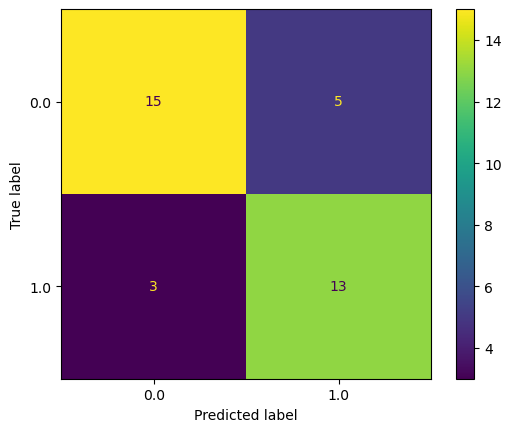

In [235]:
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
# plt.show()